In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd

path ='/content/drive/MyDrive/CSV/produksi-panen- - LUAS-PANEN-DI-JABAR.csv'
df = pd.read_csv(path)
df.describe()

,tahun,luas_panen,jumlah_produksi
count,27.000000,27.000000,27.000000
mean,2009.629630,33.259259,379.333333
std,1.779113,29.935305,398.592041
min,2007.000000,1.000000,1.000000
25%,2008.000000,13.500000,78.000000
50%,2010.000000,20.000000,200.000000
75%,2011.000000,54.000000,639.000000
max,2013.000000,105.000000,1216.000000


In [44]:
df

,tahun,jenis_komoditi,luas_panen,satuan_luas,jumlah_produksi,satuan_produksi
0,2012,Kacang Tanah,1,Ha,1,Ton
1,2012,Jagung,3,Ha,2,Ton
2,2012,Ubi Kayu,4,Ha,6,Ton
3,2011,Kacang Tanah,7,Ha,7,Ton
4,2009,Kacang Tanah,9,Ha,9,Ton
5,2010,Kacang Tanah,9,Ha,15,Ton
6,2011,Jagung,12,Ha,55,Ton
7,2010,Jagung,15,Ha,101,Ton
8,2011,Ubi Kayu,15,Ha,106,Ton
9,2009,Jagung,16,Ha,148,Ton


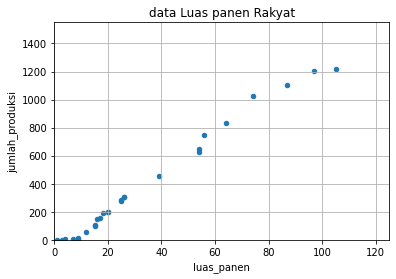

In [45]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='luas_panen', y='jumlah_produksi')

plt.title('data Luas panen Rakyat')
plt.xlabel('luas_panen')
plt.ylabel('jumlah_produksi')
plt.xlim(0, 125	)
plt.ylim(0, 1550 )
plt.grid(True)
plt.show()

In [46]:
import numpy as np
X = np.array(df['luas_panen']) 
y = np.array(df['jumlah_produksi']) 
print(f'X : {X}') 
print(f'y : {y}')

X : [  1   3   4   7   9   9  12  15  15  16  17  18  20  20  25  25  26  26
  39  54  54  56  64  74  87  97 105]
y : [   1    2    6    7    9   15   55  101  106  148  157  195  198  200
  280  285  305  305  454  628  650  751  835 1026 1104 1203 1216]


In [47]:
X = X.reshape(-1, 1) # Reshapng atau slice data
X.shape

(27, 1)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

model.fit(X, y)

LinearRegression()

In [49]:
X_vis = np.array([0, 10000]).reshape(-1, 1)
y_vis = model.predict(X_vis) 

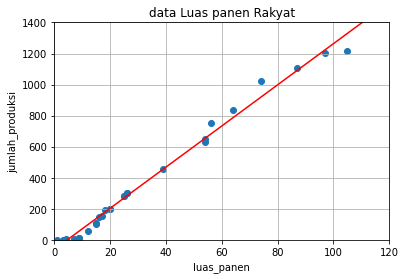

In [61]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis,'-r')

plt.title('data Luas panen Rakyat')
plt.xlabel('luas_panen')
plt.ylabel('jumlah_produksi')
plt.xlim(0, 120	)
plt.ylim(0, 1400 )
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : -99.70622085019681
slope : [13.58248103]


In [ ]:
tahun = np.array([2025, 2000, 2001, 2032,2030]).reshape(-1, 1)
tahun

array([[2025],
       [2000],
       [2001],
       [2032],
       [2030]])

In [ ]:
prediksi_tahun = model.predict(tahun)
prediksi_tahun

array([27404.81786042, 27065.25583473, 27078.83831576, 27499.89522762,
       27472.73026556])

In [ ]:
for tahun, index in zip (tahun, prediksi_tahun) : 
  print(f'tahun : {tahun} prediksi tahun : {index}')

tahun : [2025] prediksi tahun : 27404.81786042431
tahun : [2000] prediksi tahun : 27065.255834729564
tahun : [2001] prediksi tahun : 27078.838315757355
tahun : [2032] prediksi tahun : 27499.89522761884
tahun : [2030] prediksi tahun : 27472.730265563263


In [58]:
df['luas_panen'].sum()

898

In [57]:
df['jumlah_produksi'].sum()

10242

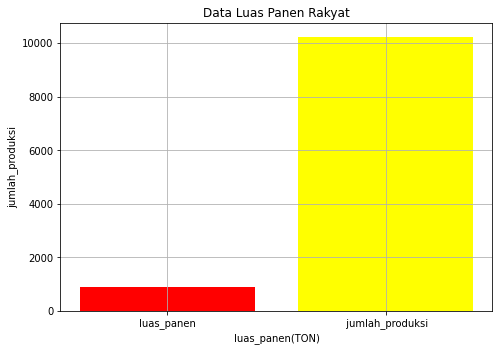

In [59]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
indeks_x = ['luas_panen',' jumlah_produksi']
indeks_y= [898, 10242 ]
c = ['red','yellow','green','blue','pink','black']
plt.title("Data Luas Panen Rakyat")
plt.xlabel("luas_panen(TON)")
plt.ylabel("jumlah_produksi")
plt.bar(indeks_x, indeks_y, color = c)
plt.grid(True)
plt.show()

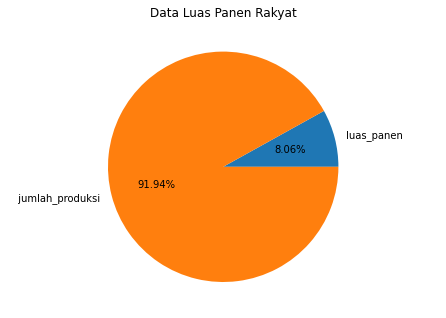

In [60]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1,1])
ax.axis('equal')
indeks_x = ['luas_panen',' jumlah_produksi']
indeks_y= [898, 10242 ]

ax.pie(indeks_y,labels=indeks_x,autopct='%1.2f%%',)
plt.title("Data Luas Panen Rakyat")
plt.show()